In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import os
import shutil

root_dir = "drive/MyDrive/NewLungData"

In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np

# Define data directory
data_dir = "drive/MyDrive/NewLungData"

# Define mean and standard deviation for normalization
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

# Define image size
image_size = (299, 299)

# Define batch size
batch_size = 32

# Define data generators for train, validation, and test sets
train_datagen = ImageDataGenerator(
    rescale=1./255
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(data_dir, 'train'),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse'
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(data_dir, 'val'),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse'
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(data_dir, 'test'),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse'
)

Found 5641 images belonging to 2 classes.
Found 1297 images belonging to 2 classes.
Found 1622 images belonging to 2 classes.


In [22]:
import tensorflow as tf

class ImprovedDeepAlexNet(tf.keras.Model):
    def __init__(self, num_classes=10):
        super(ImprovedDeepAlexNet, self).__init__()
        self.features = tf.keras.Sequential([
            tf.keras.layers.Conv2D(64, kernel_size=11, strides=4, padding='same', activation='relu', input_shape=(None, None, 3)),
            # Add batch normalization
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.ReLU(),
            tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
            tf.keras.layers.Conv2D(192, kernel_size=5, padding='same', activation='relu'),
            # Add batch normalization
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.ReLU(),
            tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
            tf.keras.layers.Conv2D(384, kernel_size=3, padding='same', activation='relu'),
            # Add batch normalization
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.ReLU(),
            tf.keras.layers.Conv2D(256, kernel_size=3, padding='same', activation='relu'),
            # Add batch normalization
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.ReLU(),
            tf.keras.layers.Conv2D(256, kernel_size=3, padding='same', activation='relu'),
            # Add batch normalization
            tf.keras.layers.BatchNormalization(),  # Add batch normalization
            tf.keras.layers.ReLU(),
            tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
        ])
        self.avgpool = tf.keras.layers.GlobalAveragePooling2D()
        self.classifier = tf.keras.Sequential([
            tf.keras.layers.Dense(4096, activation='relu'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(4096, activation='relu'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(num_classes)
        ])

    def call(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = self.classifier(x)
        return x

In [23]:
import tensorflow as tf
num_classes = 2

# Instantiate the ImprovedDeepAlexNet model
alexnet_custom_model = ImprovedDeepAlexNet(num_classes=num_classes)

# Define the loss function (SparseCategoricalCrossentropy)
criterion = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Define the optimizer (Adam)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Define the learning rate scheduler (StepDecay)
def step_decay(epoch):
    initial_learning_rate = 0.0001
    drop = 0.1
    epochs_drop = 2
    learning_rate = initial_learning_rate * tf.math.pow(drop, tf.math.floor((1 + epoch) / epochs_drop))
    return learning_rate

# Create a learning rate scheduler callback
step_lr_scheduler = tf.keras.callbacks.LearningRateScheduler(step_decay)


In [24]:
# Compile the model
alexnet_custom_model.compile(optimizer=optimizer,
                             loss=criterion,
                             metrics=['accuracy'])

In [25]:
# Print model summary
alexnet_custom_model.build((None, None, None, 3))
alexnet_custom_model.summary()

Model: "improved_deep_alex_net_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, None, None, 256)   2474304   
                                                                 
 global_average_pooling2d_1  multiple                  0         
  (GlobalAveragePooling2D)                                       
                                                                 
 sequential_3 (Sequential)   (None, 2)                 17842178  
                                                                 
Total params: 20316482 (77.50 MB)
Trainable params: 20314178 (77.49 MB)
Non-trainable params: 2304 (9.00 KB)
_________________________________________________________________


In [26]:
# Freeze convolutional base to prevent weights are being updated during training process
alexnet_custom_model.trainable = False

In [27]:
alexnet_custom_model.summary()

Model: "improved_deep_alex_net_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, None, None, 256)   2474304   
                                                                 
 global_average_pooling2d_1  multiple                  0         
  (GlobalAveragePooling2D)                                       
                                                                 
 sequential_3 (Sequential)   (None, 2)                 17842178  
                                                                 
Total params: 20316482 (77.50 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 20316482 (77.50 MB)
_________________________________________________________________


In [ ]:
# Unfreeze convolutional base to prevent weights are being updated during training process
alexnet_custom_model.trainable = True

In [29]:
alexnet_custom_model.summary()

Model: "improved_deep_alex_net_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, None, None, 256)   2474304   
                                                                 
 global_average_pooling2d_1  multiple                  0         
  (GlobalAveragePooling2D)                                       
                                                                 
 sequential_3 (Sequential)   (None, 2)                 17842178  
                                                                 
Total params: 20316482 (77.50 MB)
Trainable params: 20314178 (77.49 MB)
Non-trainable params: 2304 (9.00 KB)
_________________________________________________________________


In [30]:
total_epochs = 20
# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit the model with early stopping
history = alexnet_custom_model.fit(train_generator,
                            epochs=total_epochs,
                            validation_data=val_generator,
                            callbacks=[early_stopping])

Epoch 1/20
177/177 [==============================] - 1477s 8s/step - loss: 0.5405 - accuracy: 0.7664 - val_loss: 0.6824 - val_accuracy: 0.8273
Epoch 2/20
177/177 [==============================] - 1107s 6s/step - loss: 0.3993 - accuracy: 0.8330 - val_loss: 0.5427 - val_accuracy: 0.8273
Epoch 3/20
177/177 [==============================] - 1112s 6s/step - loss: 0.3073 - accuracy: 0.8791 - val_loss: 0.5272 - val_accuracy: 0.7548
Epoch 4/20
177/177 [==============================] - 1117s 6s/step - loss: 0.2632 - accuracy: 0.8940 - val_loss: 0.4013 - val_accuracy: 0.8281
Epoch 5/20
177/177 [==============================] - 1113s 6s/step - loss: 0.2213 - accuracy: 0.9114 - val_loss: 0.6015 - val_accuracy: 0.7155
Epoch 6/20
177/177 [==============================] - 1107s 6s/step - loss: 0.2066 - accuracy: 0.9188 - val_loss: 0.3626 - val_accuracy: 0.8589
Epoch 7/20
177/177 [==============================] - 1114s 6s/step - loss: 0.1655 - accuracy: 0.9339 - val_loss: 0.4572 - val_accuracy:

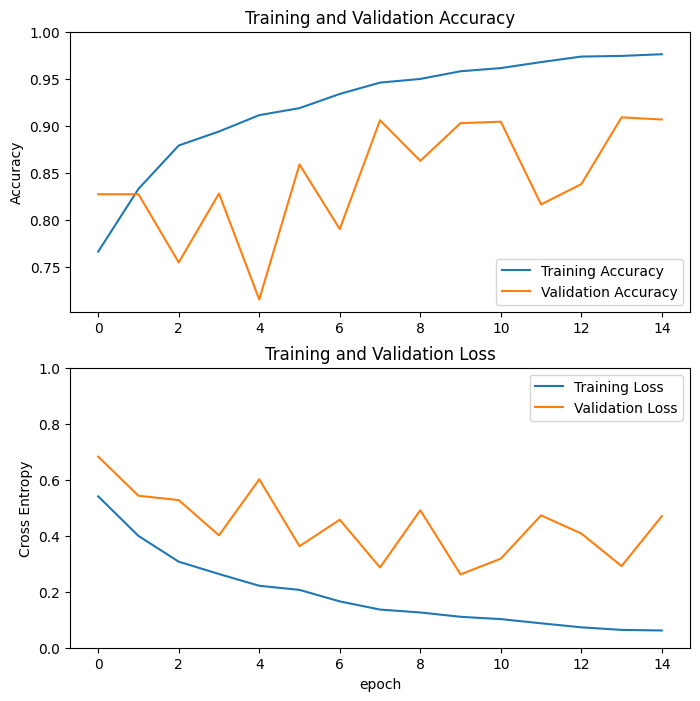

In [31]:
import matplotlib.pyplot as plt
import numpy as np
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [33]:
loss, accuracy = alexnet_custom_model.evaluate(test_generator)
print('Test accuracy of', str(accuracy))

# Save the model
model_save_path =  "drive/MyDrive/NewLungData/tenserflowModels/alexnet"

51/51 [==============================] - 469s 9s/step - loss: 0.3165 - accuracy: 0.8909
Test accuracy of 0.8908754587173462
